<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

# TS7: Trasformada Z y Respuesta en frecuencia

**Alumnas:** María Victoria Poric y Agustina Rocío Paolini Rosso  
**Carrera:** Ingeniería Biomédica    
**Materia:** Análisis y Procesamiento de Señales    
**Fecha:** Noviembre 2025 

## Consigna
Dadas las ecuaciones en diferencias de los siguientes sistemas, que representan un filtro de media móvil:  

a) $y(n) = x(n - 3) + x(n - 2) + x(n - 1) + x(n)$ 

b) $y(n) = x(n - 4) + x(n - 3) + x(n - 2) + x(n - 1) + x(n)$

c) $y(n) = x(n) - x(n - 1)$

d) $y(n) = x(n) - x(n - 2)$

1) Hallar $T(z) = \frac{Y(z)}{X(z)}$

2) Calcular su respuesta en frecuencia de módulo y fase.

3) Simular y validar la respuesta en frecuencia de todos los sistemas con Numpy.

## Introducción
En el análisis y diseño de sistemas digitales de procesamiento de señales, las ecuaciones en diferencias constituyen la forma más habitual de describir la relación entre la señal de entrada y la señal de salida de un sistema lineal e invariante en el tiempo (LTI). En el dominio discreto, estas ecuaciones son el análogo directo de las ecuaciones diferenciales empleadas en sistemas contínuos, y permiten modelar operaciones como filtrado, diferenciación o promediado mediante combinaciones lineales de muestras retardadas. 

De manera general, un sistema discreto LTI puede expresarse como:
$$
y(n) = \sum_{k=0}^{M} b_k\,x(n-k) - \sum_{k=1}^{N} a_k\,y(n-k) \tag{1}
$$

donde $x(n)$ e $y(n)$ representan la entrada y la salida del sistema, respectivamente, y los coeficientes $a_k$ y $b_k$ determinan su comportamiento dinámico. 

Cuando la salida depende únicamente de valores presentes y pasados de la entrada, el sistema se denomina FIR (Finite Impulse Response) o de respuesta finita al impulso, caracterizado por tener $a_k = 0$ para todo $k > 0$. este tipo de sistemas es siempre estable y causal, y suele emplearse ampliamente en el diseño de filtros digitales. 

La transformada Z es una herramienta fundamental en el análisis de sistemas discretos, ya que permite representar señales y sistemas en el dominio complejo de manera algebraica. Dada una señal discreta $x(n)$, su transformada Z se define como:
$$
X(z) = \sum_{n=-\infty}^{\infty} x(n)\,z^{-n} \tag{2}
$$
donde $z$ es una variable compleja que puede escribirse como $z = re^{j\omega}$, 
con $r$ representando el módulo y $\omega$ la frecuencia angular. Esta ransformación convierte la operación de convolución temporal en una simple multiplicación algebraica en el dominio $z$, lo que simplifica el análisis y la resolución de ecuaciones en diferencias. Además, proporciona una descripción general del comportamiento del sistema en función de la ubicación de sus polos y ceros, y permite estudiar su estabilidad y respuesta en frecuencia.

Al aplicar la transformada Z a la ecuación de diferencias se obtiene una descripción algebraica del sistema en el dominio complejo:
$$
Y(z) = H(z)X(z)
$$
donde la función transferencia $H(z)$ se define como:
$$
H(z) = \frac{Y(z)}{X(z)} = \frac{\sum_{k=0}^{M} b_k z^{-k}}{1 + \sum_{k=1}^{N} a_k z^{-k}} \tag{3}
$$

En el caso de los sistemas FIR, el denominador es igual a uno, por lo que $H(z)$ resulta ser un polinomio de potencias negativas de $z$. Esta función describe completamente el comportamiento del sistema y permite analizar sus propiedades mediante la ubicación de polos y ceros en el plano z. 

Un aspecto fundamental del estudio de filtros digitales es su respuesta en frecuencia, que se obtiene al evaluar la función de transferencia sobre el círculo unitario $z = e^{j\omega}$:
$$
H(e^{j\omega}) = H(z)\big|_{z=e^{j\omega}} \tag{4}
$$
Esta expresión permite conocer cómo el sistema modifica la amplitud y la fase de las componentes espectrales de una señal. El módulo $|H(e^{j\omega})|$ indica la atenuación o amplificación de cada frecuencia, mientras que el argumento $\angle H(e^{j\omega})$ determina el desplazamiento de fase introducido por el sistema. 

En el caso particular de los filtros de media móvil, la salida se obtiene como el promedio de un número finito de muestras de la entrada. Estos filtros se utilizan principalmente como filtros pasa bajos, ya que tienden a suavizar variaciones rápidas en la señal, eliminando componentes de alta frecuencia. Su respuesta en frecuencia presenta una magnitud que decrece con la frecuencia y una fase aproximadamente lineal, lo que implica un retardo constante de grupo. En contraposición, los filtros diferenciadores (como los definidos por diferencias entre muestras sucesivas) actúan como pasa altos, resaltando los cambios o transiciones rápidas en la señal.

El objetivo de esta práctica es analizar los sistemas de forma analítica, a partir de la forma cerrada de $H(e^{j\omega})$, y de forma numérica, empleando herramientas computacionales, como la función `signal.freqz` de la librería *Scipy*. Se busca comparar los resultados obtenidos con las expresiones teóricas, verificando la concordancia entre ambas representaciones. Asimismo, resulta fundamental comprender cómo las operaciones de promediado y diferenciación se reflejan en el dominio de la frecuencia, y cómo las herramientas numéricas permiten verificar de manera precisa el comportamiento previsto de cada sistema.

## Análisis y desarrollo

En primer lugar se resolvieron analíticamente las ecuaciones en diferencias:

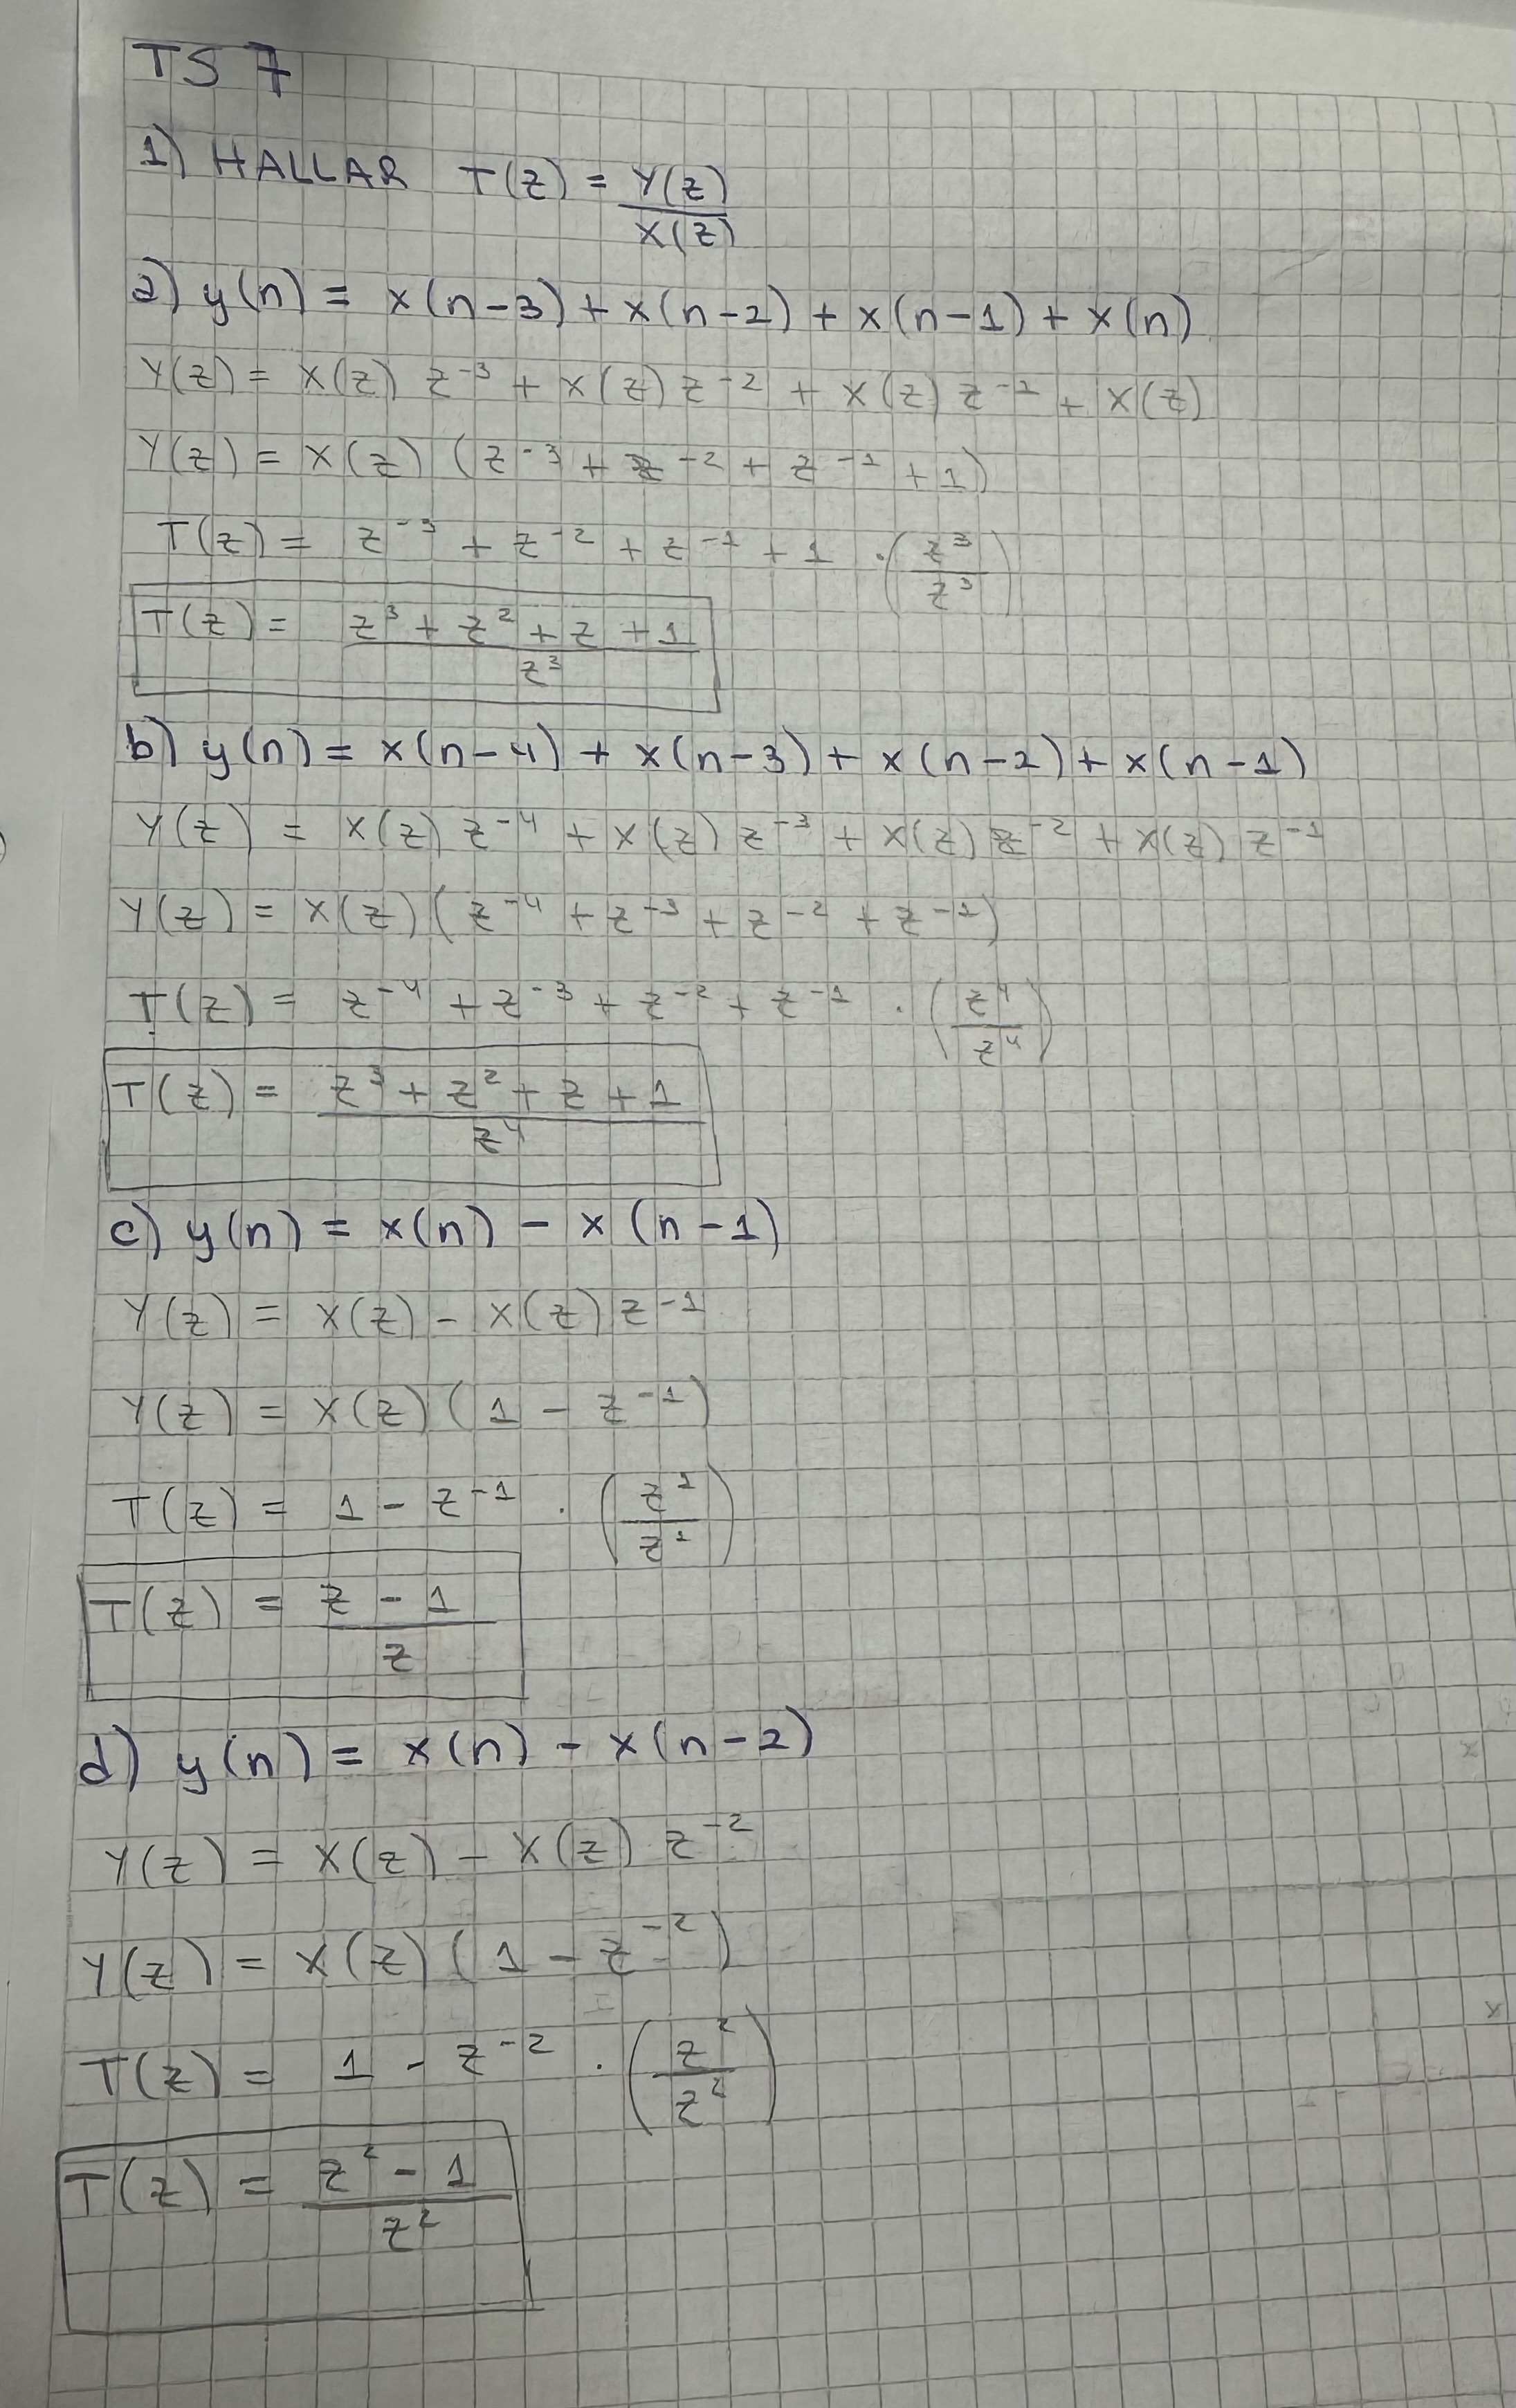

In [1]:
from IPython.display import Image, display
display(Image(filename="TS7-P1.jpeg"))

Luego, se resolvió también analíticamente el módulo y fase de la repuesta en frecuencia de las ecuaciones:

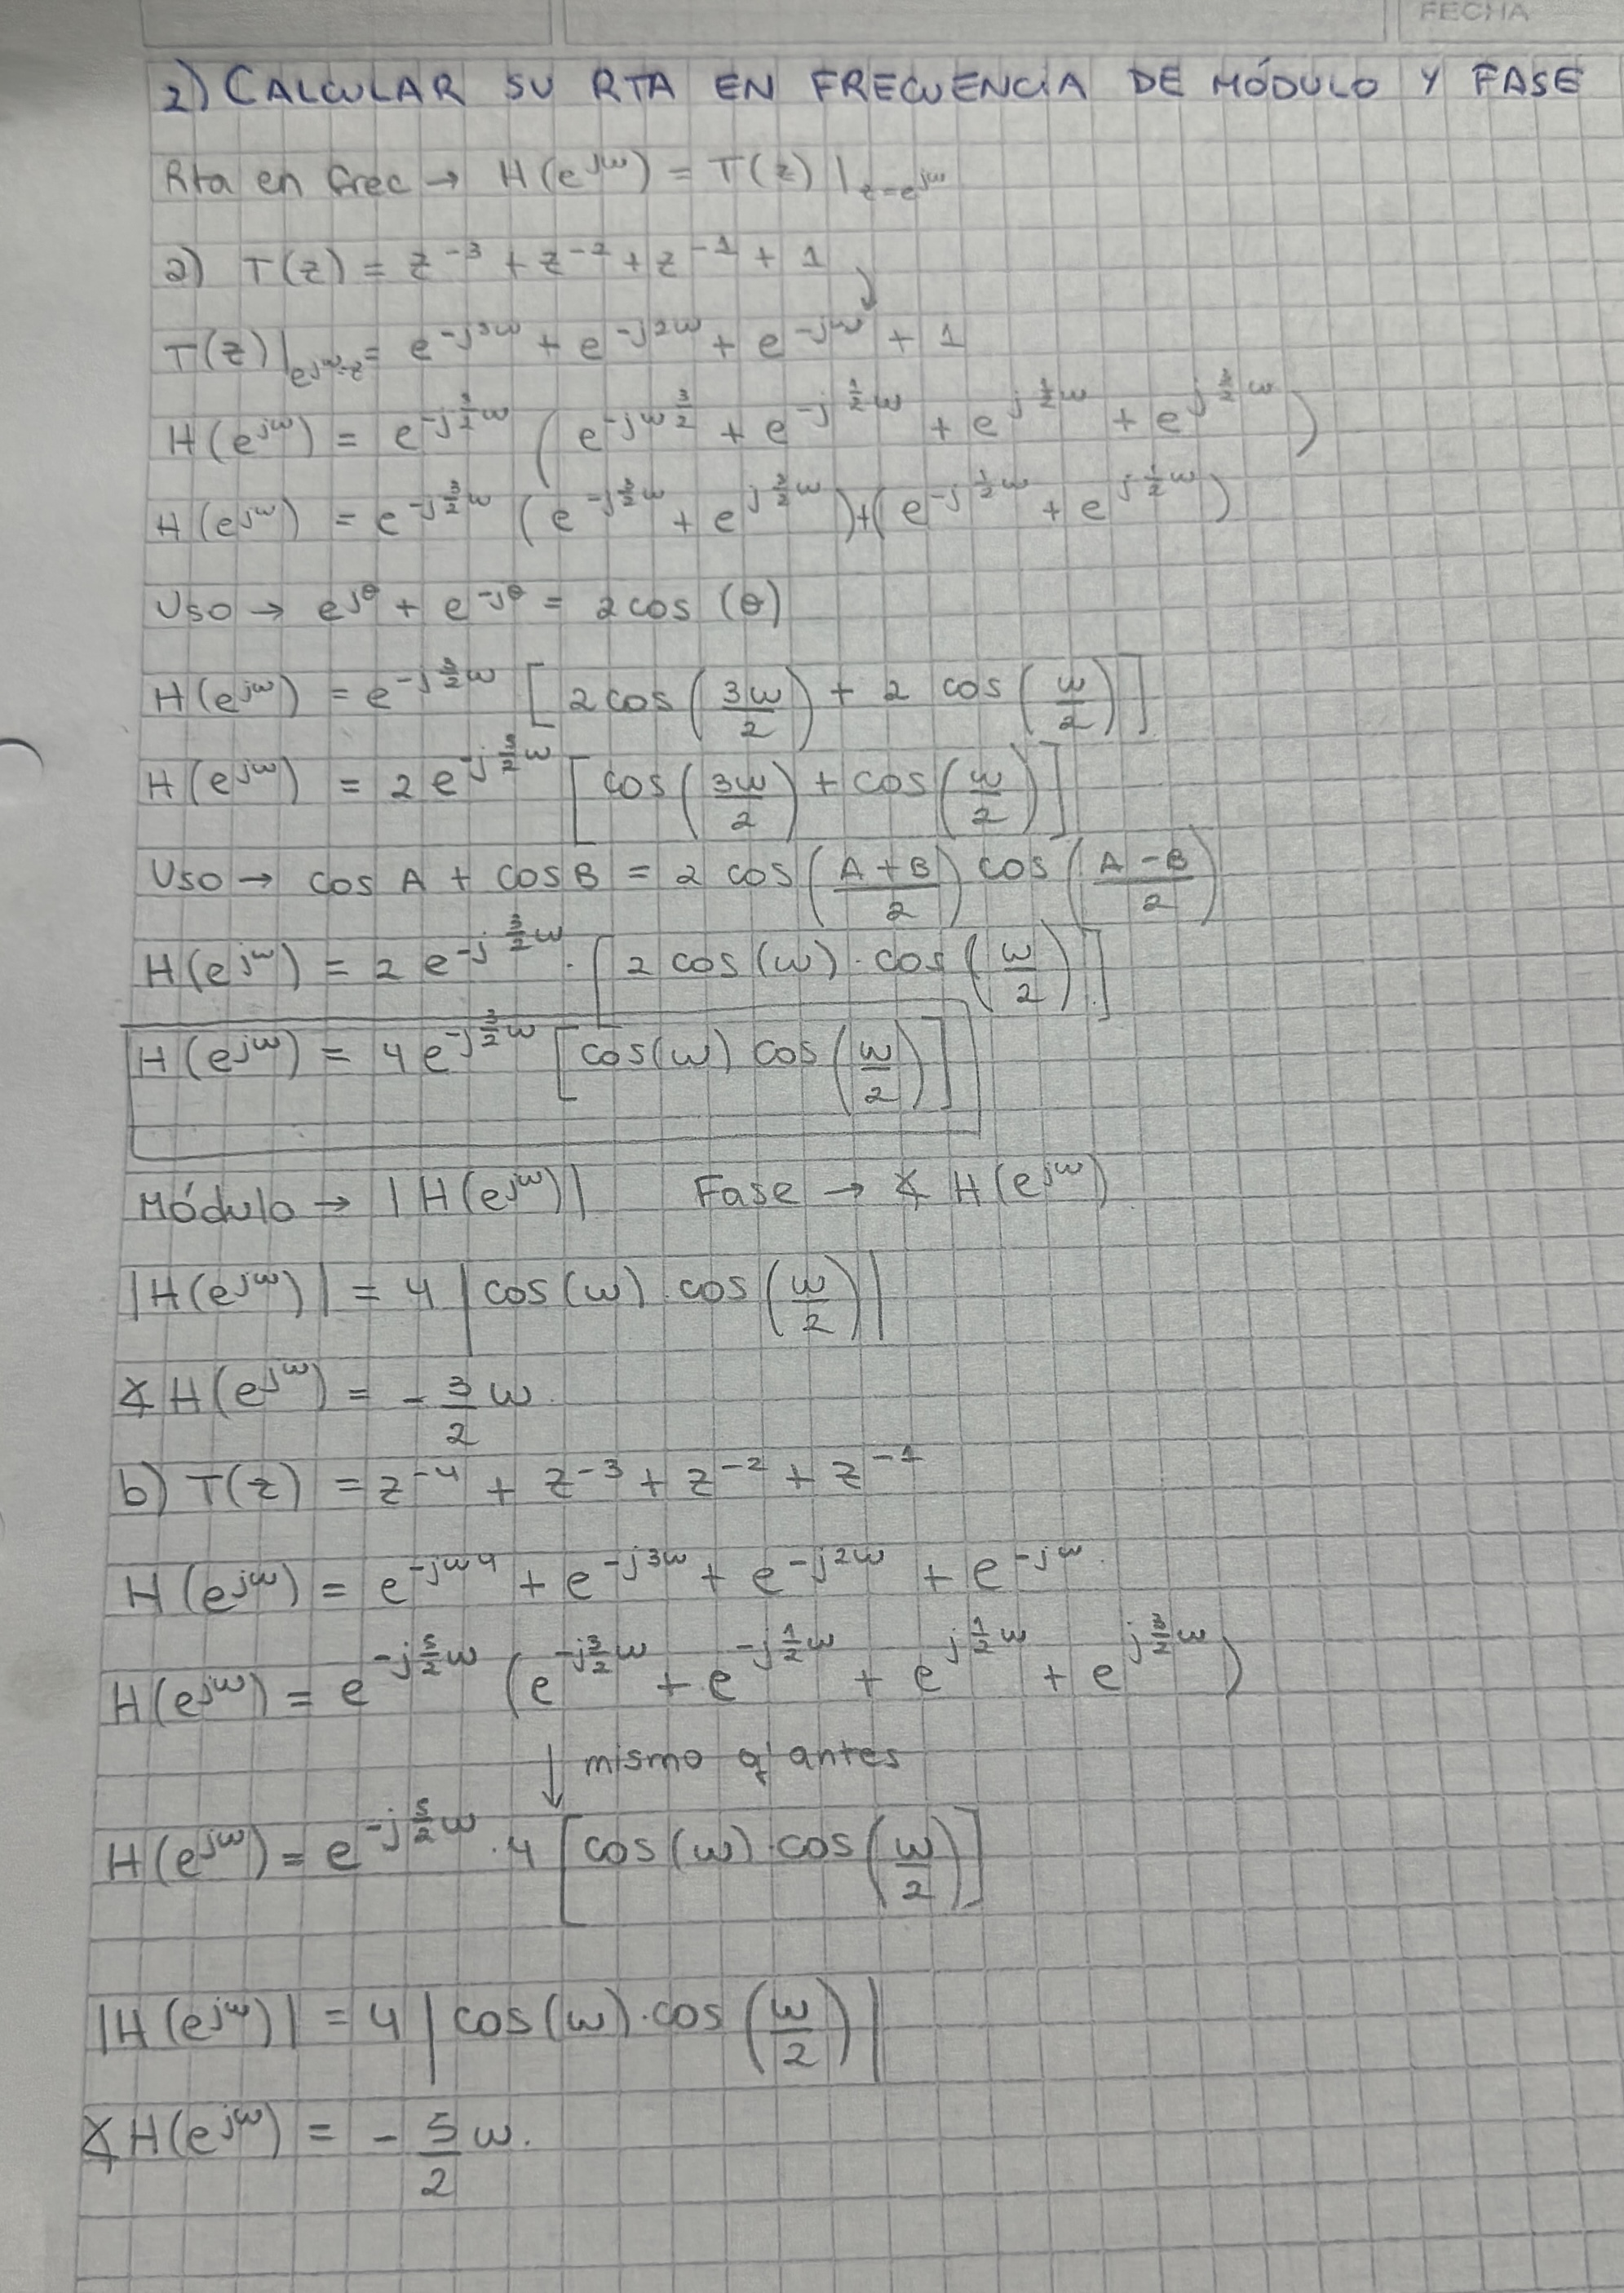

In [2]:
from IPython.display import Image, display
display(Image(filename="TS7-P2-a-b.jpg"))

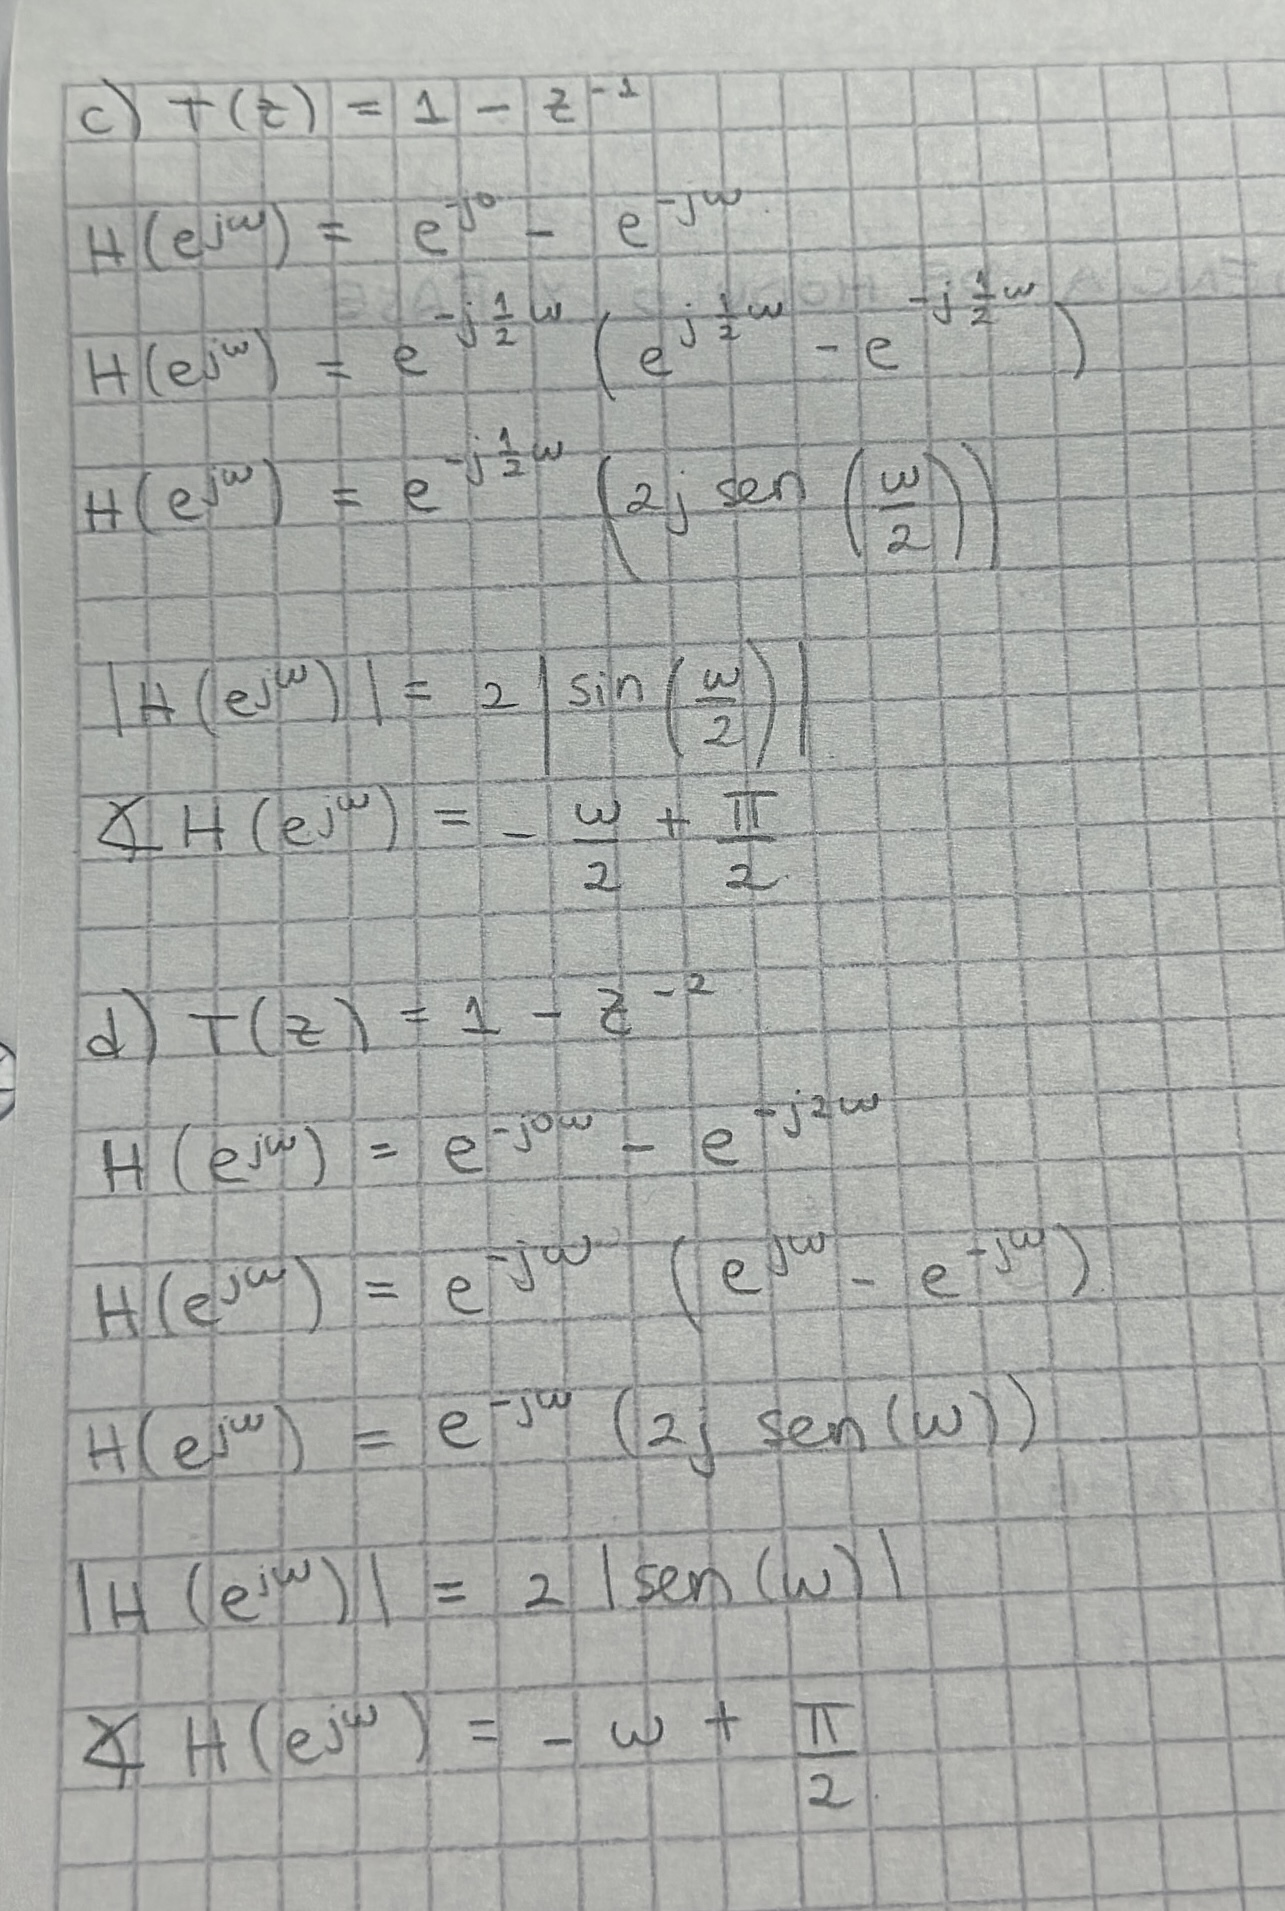

In [3]:
from IPython.display import Image, display
display(Image(filename="TS7-P2-c-d.jpg"))

En el caso de la ecuación (a) su respuesta en frecuencia es equivalente a 
$$
H(e^{j\omega}) = e^{-j\frac{3\omega}{2}} \cdot \frac{\sin(2\omega)}{\sin\left(\frac{\omega}{2}\right)}
$$
Esto se debe a que, usando identidades trigonométricas llegamos a la misma expresión con `cosenos`. 

Sabiendo que 
$$
\sin(2\omega) = 2 \sin(\omega) \cdot \cos(\omega)
$$
Y que 
$$
\sin(\omega) = 2 \sin(\frac{\omega}{2}) \cdot \cos(\frac{\omega}{2})
$$

Entonces, 
$$
\sin(2\omega) = 2 \sin(\omega) \cos(\omega) = 2 \cdot (2 \sin(\frac{\omega}{2}) \cos(\frac{\omega}{2})) \cdot \cos(\omega) = 4 \sin(\frac{\omega}{2}) \cdot \cos(\frac{\omega}{2}) \cdot \cos(\omega)
$$

Dividiendo por $\sin(\frac{\omega}{2})$ se cancela ese factor: 
$$
\frac{\sin(2\omega)}{\sin(\frac{\omega}{2})} = \frac{4 \sin(\frac{\omega}{2}) \cdot \cos(\frac{\omega}{2}) \cdot \cos(\omega)}{\sin(\frac{\omega}{2})} = 4 \cos(\omega) \cdot \cos(\frac{\omega}{2})
$$

Sucede algo similar para la ecuación (b): usando las identidades mencionadas previamente 
$$
\sin(2\omega) = 2\sin(\omega) \cos(\omega) = 4 \sin(\frac{\omega}{2}) \cdot \cos(\frac{\omega}{2}) \cdot \cos(\omega)
$$ 
Y dividiendo por $\sin(\frac{\omega}{2})$, nuevamente, se obtiene la misma expresión analítica.  

Finalmente, se desarrolló en Python un conjunto de simulaciones numéricas con el objetivo de validar experimentalmente las respuestas en frecuencia de los cuatro filtros propuestos.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


# Defino los coeficientes de cada filtro

b_a = [1, 1, 1, 1]           # (a)
b_b = [1, 1, 1, 1, 1]        # (b)
b_c = [1, -1]                # (c)
b_d = [1, 0, -1]             # (d)

# Denominador
a = [1]


# Cálculo de la respuesta en frecuencia

w_a, h_a = signal.freqz(b_a, a)
w_b, h_b = signal.freqz(b_b, a)
w_c, h_c = signal.freqz(b_c, a)
w_d, h_d = signal.freqz(b_d, a)


# Respuestas en frecuencia obtenidas analíticamente
eps = 1e-12  # evita divisiones por cero

# a)
h_a_ana = np.exp(-1j*3*w_a/2) * (np.sin(2*w_a)/(np.sin(w_a/2) + eps))

# b)
h_b_ana = np.exp(-1j*2*w_b) * (np.sin(5*w_b/2)/(np.sin(w_b/2) + eps))

# c)
h_c_ana = np.exp(-1j*w_c/2) * (2j*np.sin(w_c/2))

# d)
h_d_ana = np.exp(-1j*w_d)*(2j*np.sin(w_d))

En primer lugar, se definieron los coeficientes de los cuatro filtros analizados, siguiendo la idea conceptual de (1). Dado que se trata de filtros FIR, el denominador es simplemente `a = [1]`, lo que implica que no hay realimentación en el sistema. Los filtros definidos difieren en la cantidad y el signo de sus coeficientes, lo que afecta la forma de su respuesta en frecuencia y, por lo tanto, la manera en que modifican las distintas componentes frecuenciales de la señal de entrada.

Luego, se utilizó la función `signal.freqz` de la librería `scipy.signal` para calcular numéricamente la respuesta en frecuencia de cada filtro. Esta función evalúa la transformada Z del sistema en la circunferencia unitaria y devuelve el valor complejo $H(e^{j\omega})$ para un conjunto de frecuencias normalizadas. Con esta información se obtiene el módulo y la fase de la respuesta, que describen cómo el sistema altera la amplitud y el desfase de las distintas componentes de frecuencia de la señal.

Asimismo, se incluyeron las respuestas en frecuencia que se obtuvieron de forma analítica en el punto (2), con el fin de poder comparar dichas expresiones con las obtenidas numéricamente. Esta comparación se realizó de manera gráfica para facilitar la interpretación y el análisis de las diferencias o coincidencias entre ambos métodos.

De esta forma, se generaron los gráficos comparativos del módulo y la fase para cada filtro, representando en cada caso la curva correspondiente al resultado numérico junto con la obtenida analíticamente. Además, la función `np.unwrap()` se utilizó para eliminar los saltos bruscos de la fase, mostrando su variación de manera continua.

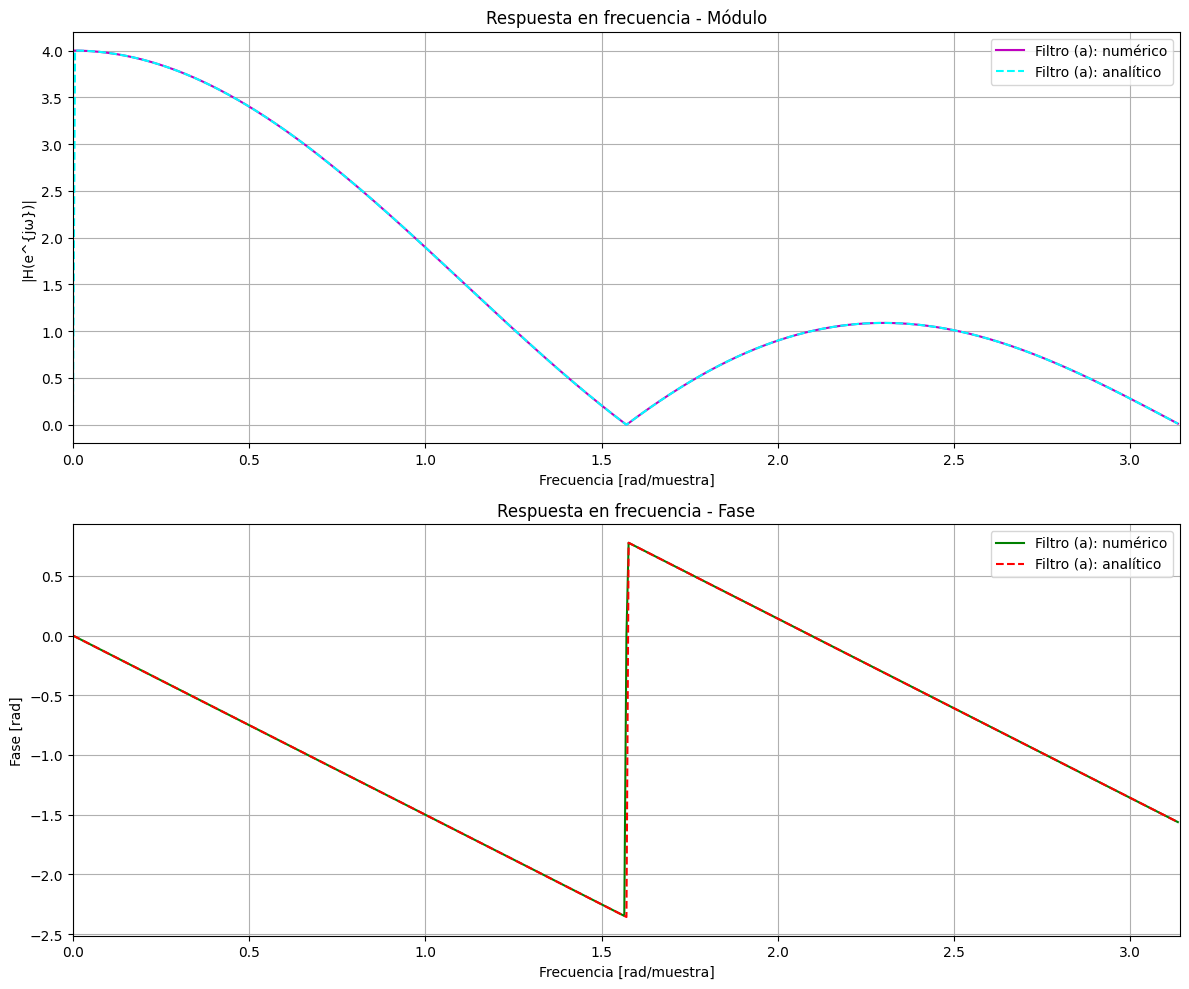

In [5]:
# Grafico el módulo y la fase
plt.figure(figsize=(12, 10))

# ----------- MÓDULO -----------
plt.subplot(2, 1, 1)
plt.plot(w_a, np.abs(h_a), color = 'm', label='Filtro (a): numérico')
plt.plot(w_a, np.abs(h_a_ana), color = 'cyan', linestyle= '--', label='Filtro (a): analítico')
plt.title('Respuesta en frecuencia - Módulo')
plt.xlabel('Frecuencia [rad/muestra]')
plt.xlim([0, np.pi])
plt.ylabel('|H(e^{jω})|')
plt.grid(True)
plt.legend()

# ----------- FASE -----------
plt.subplot(2, 1, 2)
plt.plot(w_a, np.unwrap(np.angle(h_a)), color = 'g', label='Filtro (a): numérico')
plt.plot(w_a, np.unwrap(np.angle(h_a_ana)), color = 'r', linestyle= '--', label='Filtro (a): analítico')
plt.title('Respuesta en frecuencia - Fase')
plt.xlabel('Frecuencia [rad/muestra]')
plt.xlim([0, np.pi])
plt.ylabel('Fase [rad]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

En el caso del filtro (a), cuyos coeficientes son `b = [1,1,1,1]`, se trata de un filtro FIR de cuatro coeficientes idénticos, que puede interpretarse como un promediador de cuatro muestras consecutivas. En el dominio temporal, esto equivale a suavizar la señal, ya que cada salida es la suma de las últimas cuatro entradas. En el dominio frecuencial, este comportamiento se traduce en una respuesta pasa bajos, donde las bajas frecuencias se mantienen con ganancia alta y las altas frecuencias se atenúan.

Así, en su gráfico, el módulo presenta una forma típica de un filtro pasa bajos: toma su valor máximo de `4` en $\omega = 0$, lo que refleja que las componentes de baja frecuencia atraviesan el sistema sin atenuación, y luego decrece gradualmente hasta anularse en torno a $\omega \approx 1{,}5$ rad/muestra, donde se ubica el primer cero de la respuesta, y nuevamente en $\omega = \pi$, donde la atenuación es total.

Por su parte, la fase muestra un comportamiento lineal decreciente desde 0 hasta aproximadamente –2,5 radianes antes del primer cero, lo que indica un retardo de fase constante, coherente con la simetría de los coeficientes. En el punto donde el módulo se anula, la fase presenta un salto abrupto (propio de la anulación de la respuesta compleja) y luego continúa con pendiente negativa. Este comportamiento confirma que el filtro introduce un retardo constante para las componentes de baja frecuencia y atenúa progresivamente las altas, cumpliendo así con la función típica de un filtro FIR pasa bajos promediador.

Para el filtro (b):

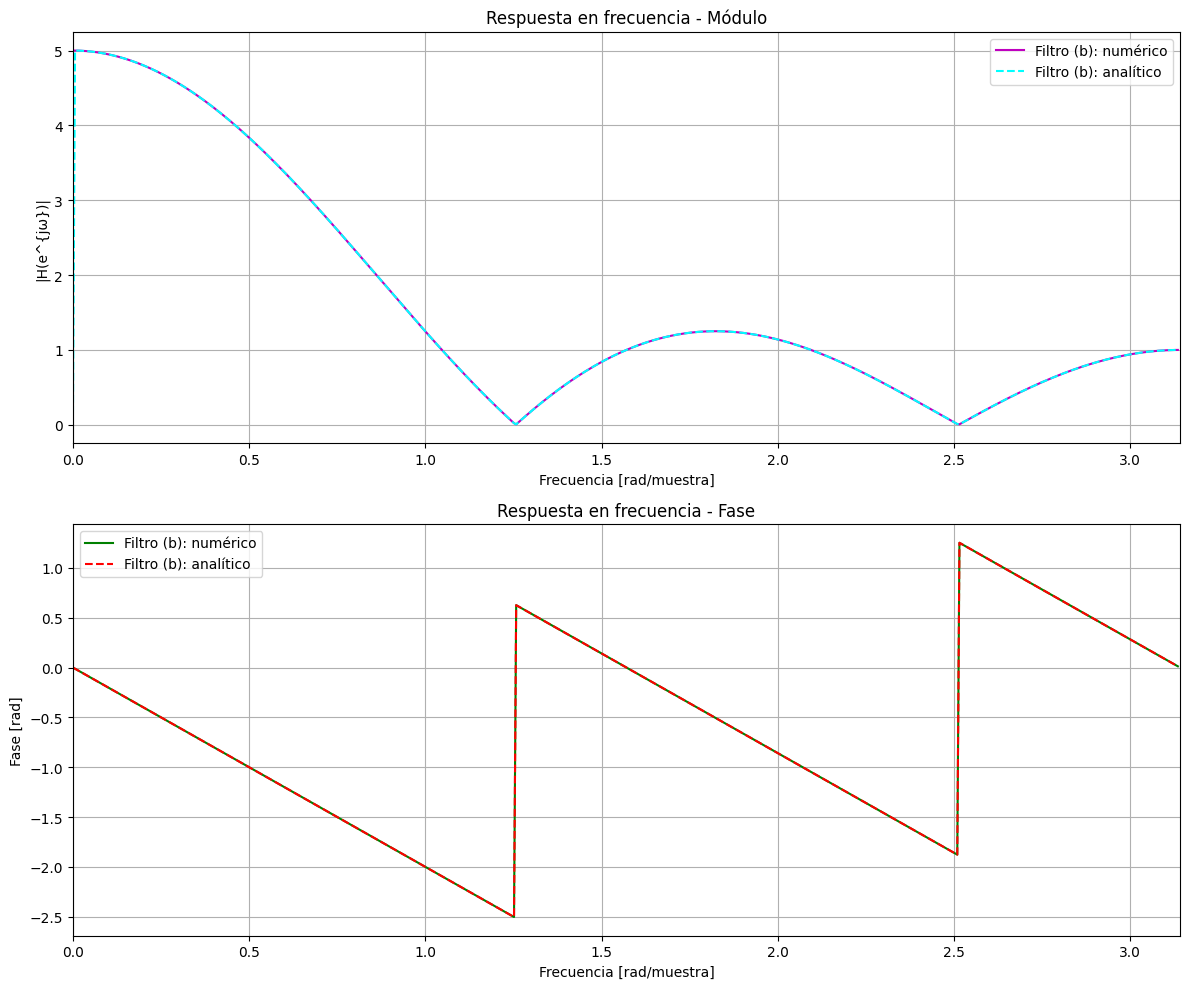

In [6]:
plt.figure(figsize=(12, 10))

# ----------- MÓDULO -----------
plt.subplot(2, 1, 1)
plt.plot(w_b, np.abs(h_b), color = 'm', label='Filtro (b): numérico')
plt.plot(w_b, np.abs(h_b_ana), color = 'cyan', linestyle= '--', label='Filtro (b): analítico')
plt.title('Respuesta en frecuencia - Módulo')
plt.xlabel('Frecuencia [rad/muestra]')
plt.xlim([0, np.pi])
plt.ylabel('|H(e^{jω})|')
plt.grid(True)
plt.legend()

# ----------- FASE -----------
plt.subplot(2, 1, 2)
plt.plot(w_b, np.unwrap(np.angle(h_b)), color = 'g', label='Filtro (b): numérico')
plt.plot(w_b, np.unwrap(np.angle(h_b_ana)), color = 'r', linestyle= '--', label='Filtro (b): analítico')
plt.title('Respuesta en frecuencia - Fase')
plt.xlabel('Frecuencia [rad/muestra]')
plt.xlim([0, np.pi])
plt.ylabel('Fase [rad]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


En este caso, los coeficientes son `b = [1,1,1,1,1]`, por lo que, al igual que el filtro anterior, presenta una respuesta de filtro pasa bajos FIR. En el dominio temporal, este sistema actúa como un promediador de cinco muestras consecutivas, lo cual produce un efecto de suavizado sobre la señal: las variaciones rápidas se atenúan y se conservan principalmente las componentes de baja frecuencia.

En el módulo de la respuesta en frecuencia, la ganancia máxima se alcanza en $\omega = 0$, donde el valor es 5, indicando que las componentes de baja frecuencia se transmiten sin atenuación. A medida que la frecuencia aumenta, la magnitud decrece progresivamente hasta anularse por completo entre $\omega = 1$ rad/muestra y $\omega = 1.5$ rad/muestra, donde se ubica el primer cero, y nuevamente en $\omega \approx 2{,}5$ rad/muestra, correspondiente al segundo cero de la respuesta. Entre ambos ceros se aprecia un pequeño lóbulo secundario, lo que es típico en este tipo de estructuras promediadoras y refleja la naturaleza oscilatoria de la función de transferencia discreta. Este patrón, que presenta una envolvente similar a una función sinc, evidencia la propiedad de paso bajo del filtro: deja pasar las frecuencias bajas con alta ganancia y atenúa de forma creciente las componentes más altas.

En cuanto a la fase, se observa un comportamiento aproximadamente lineal decreciente en los tramos donde el módulo no se anula, indicando un retardo de fase constante para las bajas frecuencias. En los puntos donde el módulo se hace cero, la fase experimenta saltos abruptos de $2\pi$, producto del cambio de signo en la respuesta compleja. Este fenómeno es habitual en los filtros FIR con coeficientes simétricos y no altera la linealidad general de fase en la banda de paso.

Al compararlo con el filtro anterior, se observa que este filtro mantiene su naturaleza pasa bajos, pero con una mayor selectividad en frecuencia: presenta una banda de paso más estrecha, una transición más definida y una atenuación más pronunciada en las frecuencias altas. Esto demuestra que al incrementar la cantidad de coeficientes idénticos, es decir, al aumentar el número de muestras promediadas, el filtro se vuelve más eficaz para eliminar componentes de alta frecuencia y producir una salida más suavizada.

Seguidamente, para el filtro (c):

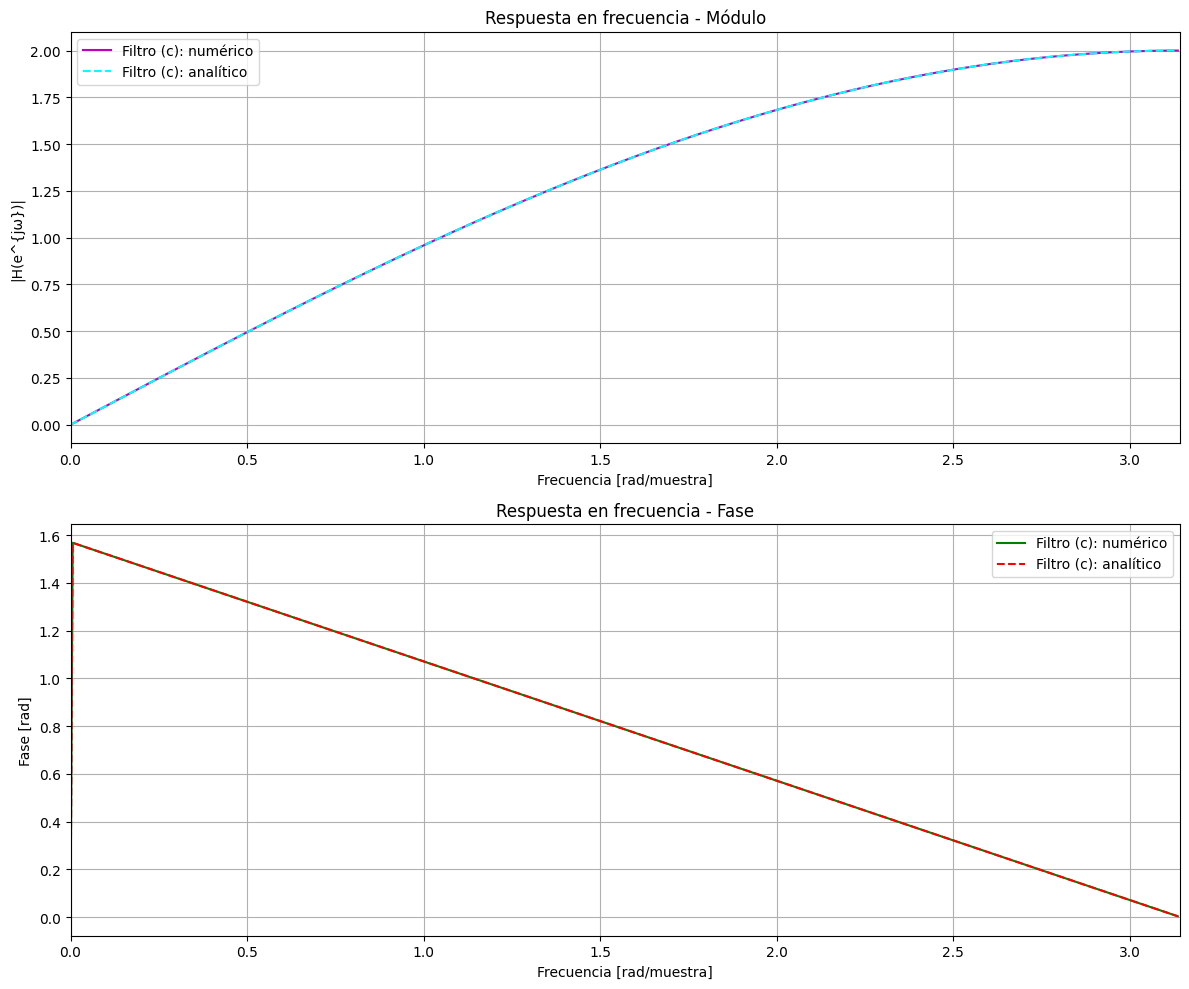

In [7]:
plt.figure(figsize=(12, 10))

# ----------- MÓDULO -----------
plt.subplot(2, 1, 1)
plt.plot(w_c, np.abs(h_c), color = 'm', label='Filtro (c): numérico')
plt.plot(w_c, np.abs(h_c_ana), color = 'cyan', linestyle= '--', label='Filtro (c): analítico')
plt.title('Respuesta en frecuencia - Módulo')
plt.xlabel('Frecuencia [rad/muestra]')
plt.xlim([0, np.pi])
plt.ylabel('|H(e^{jω})|')
plt.grid(True)
plt.legend()

# ----------- FASE -----------
plt.subplot(2, 1, 2)
plt.plot(w_c, np.unwrap(np.angle(h_c)), color = 'g', label='Filtro (c): numérico')
plt.plot(w_c, np.unwrap(np.angle(h_c_ana)), color = 'r', linestyle= '--', label='Filtro (c): analítico')
plt.title('Respuesta en frecuencia - Fase')
plt.xlabel('Frecuencia [rad/muestra]')
plt.xlim([0, np.pi])
plt.ylabel('Fase [rad]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


En este filtro, tanto la representación numérica como la analítica coinciden plenamente, mostrando una respuesta en frecuencia de tipo pasa altos. En el módulo, la ganancia parte desde un valor prácticamente nulo en $\omega = 0$, lo que indica que el filtro bloquea las componentes de baja frecuencia o de continua, y crece de manera casi monótona hasta alcanzar su máximo alrededor de $\omega = \pi$, donde toma un valor cercano a 2. Este comportamiento refleja que el filtro amplifica o deja pasar preferentemente las componentes de alta frecuencia, suprimiendo las más bajas.

La fase presenta una variación lineal y decreciente con la frecuencia, lo que indica que el sistema mantiene una relación de fase proporcional con $\omega$, es decir, posee un retardo de fase constante o comportamiento lineal de fase. Este tipo de fase garantiza que el filtro no distorsiona la forma temporal de las componentes de alta frecuencia, sino que únicamente las retrasa en el tiempo.

Desde el punto de vista temporal, este filtro puede interpretarse como una diferencia entre muestras consecutivas, operación que actúa como un detector de cambios: las señales lentas o constantes (baja frecuencia) se anulan, mientras que las transiciones rápidas (alta frecuencia) se realzan. Por ello, su naturaleza es claramente pasa altos, complementando el efecto de los filtros (a) y (b), que se comportan como promediadores o pasa bajos.

Finalmente, para el filtro (d):

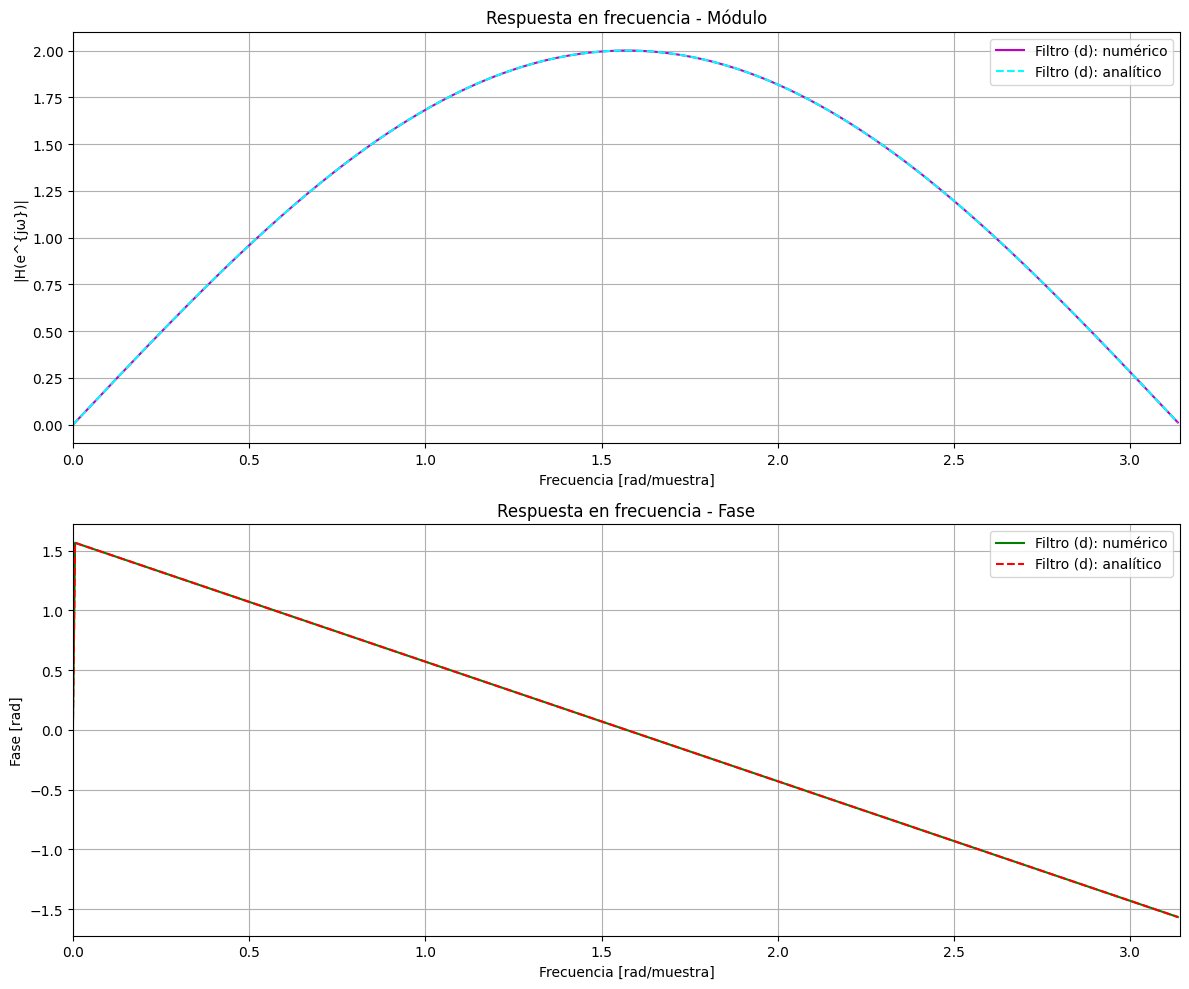

In [8]:
plt.figure(figsize=(12, 10))

# ----------- MÓDULO -----------
plt.subplot(2, 1, 1)
plt.plot(w_d, np.abs(h_d), color = 'm', label='Filtro (d): numérico')
plt.plot(w_d, np.abs(h_d_ana), color = 'cyan', linestyle= '--', label='Filtro (d): analítico')
plt.title('Respuesta en frecuencia - Módulo')
plt.xlabel('Frecuencia [rad/muestra]')
plt.xlim([0, np.pi])
plt.ylabel('|H(e^{jω})|')
plt.grid(True)
plt.legend()

# ----------- FASE -----------
plt.subplot(2, 1, 2)
plt.plot(w_d, np.unwrap(np.angle(h_d)), color = 'g', label='Filtro (d): numérico')
plt.plot(w_d, np.unwrap(np.angle(h_d_ana)), color = 'r', linestyle= '--', label='Filtro (d): analítico')
plt.title('Respuesta en frecuencia - Fase')
plt.xlabel('Frecuencia [rad/muestra]')
plt.xlim([0, np.pi])
plt.ylabel('Fase [rad]')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Se observa que el módulo de la respuesta en frecuencia parte desde un valor nulo en $\omega = 0$, aumenta progresivamente hasta alcanzar un máximo alrededor de $\omega = \pi/2$, y luego vuelve a decrecer de forma simétrica hacia cero en $\omega = \pi$. Esta forma parabólica indica que el filtro deja pasar las frecuencias intermedias mientras atenúa tanto las bajas como las altas, por lo que su comportamiento es característico de un filtro pasa banda. La máxima ganancia se ubica aproximadamente en la mitad del rango de frecuencias, lo que refuerza la idea de que este filtro resalta las componentes de frecuencia media de la señal de entrada.

La fase, en cambio, presenta una variación lineal y continua, con pendiente negativa. Esto implica que el filtro mantiene una relación lineal entre fase y frecuencia, lo que corresponde a un retardo de grupo constante. En términos prácticos, el filtro introduce un retardo temporal igual para todas las componentes de frecuencia dentro de la banda donde actúa, evitando así la distorsión de fase.

Desde un punto de vista conceptual, este tipo de respuesta puede interpretarse como una combinación de efectos diferenciales y promediadores, donde las componentes bajas son suprimidas por su similitud entre muestras sucesivas (como en un pasa altos), y las componentes muy altas se atenúan por interferencia entre términos (como en un pasa bajos). El resultado es una realce selectivo de una zona intermedia del espectro, propia de un comportamiento pasa banda.

## Conclusión
El análisis realizado permitió verificar de manera consistente la correspondencia entre las expresiones analíticas y los resultados numéricos obtenidos mediante simulación computacional, confirmando la validez de las herramientas teóricas empleadas en el estudio de sistemas digitales lineales e invariantes en el tiempo. A partir de la comparación entre la forma de $H(e^{j\omega})$ y los resultados obtenidos con la función `signal.freqz`, se comprobó que ambos métodos describen fielmente el mismo comportamiento frecuencial, tanto en módulo como en fase, con coincidencias prácticamente exactas en todo el rango de frecuencias consideradas.

En particular, los filtros (a) y (b), correspondientes a estructuras FIR promediadoras, mostraron respuestas en frecuencia típicamente pasa bajos, donde las componentes de baja frecuencia se transmiten con ganancia máxima mientras que las altas son progresivamente atenuadas. La comparación entre ambos evidenció que el incremento en la cantidad de coeficientes promediados aumenta la selectividad del filtro, estrechando la banda de paso y mejorando la atenuación en las frecuencias indeseadas, lo que se traduce en un mayor suavizado de la señal en el dominio temporal.

Por otro lado, el filtro (c) presentó un comportamiento opuesto: su respuesta en frecuencia es claramente de tipo pasa altos, bloqueando la componente continua y realzando las variaciones rápidas de la señal. 

Finalmente, el filtro (d) exhibió una respuesta intermedia, de tipo pasa banda, caracterizada por la transmisión preferencial de frecuencias medias y la atenuación de las bajas y altas. Este comportamiento surge como una combinación de los efectos observados en los casos anteriores, mostrando cómo la elección adecuada de coeficientes permite obtener distintas selectividades y configuraciones espectrales a partir de la misma formulación general.

En todos los casos, la linealidad de fase observada en las simulaciones confirma que los filtros FIR analizados no introducen distorsión de fase apreciable en la banda de paso, manteniendo un retardo de grupo constante. Este aspecto, junto con la estabilidad inherente a los sistemas FIR, resalta su importancia práctica en el diseño de filtros digitales.